<a href="https://colab.research.google.com/github/XM2202-02/AI-CHALLENGE-3I/blob/master/HETHONGTINHTIENDOAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✨ Welcome to F5 – Refreshing Ideas, Delicious Tech! 🚀
🔓 Secret Unlocked: MEAL at UEH Canteen 🍱🎉


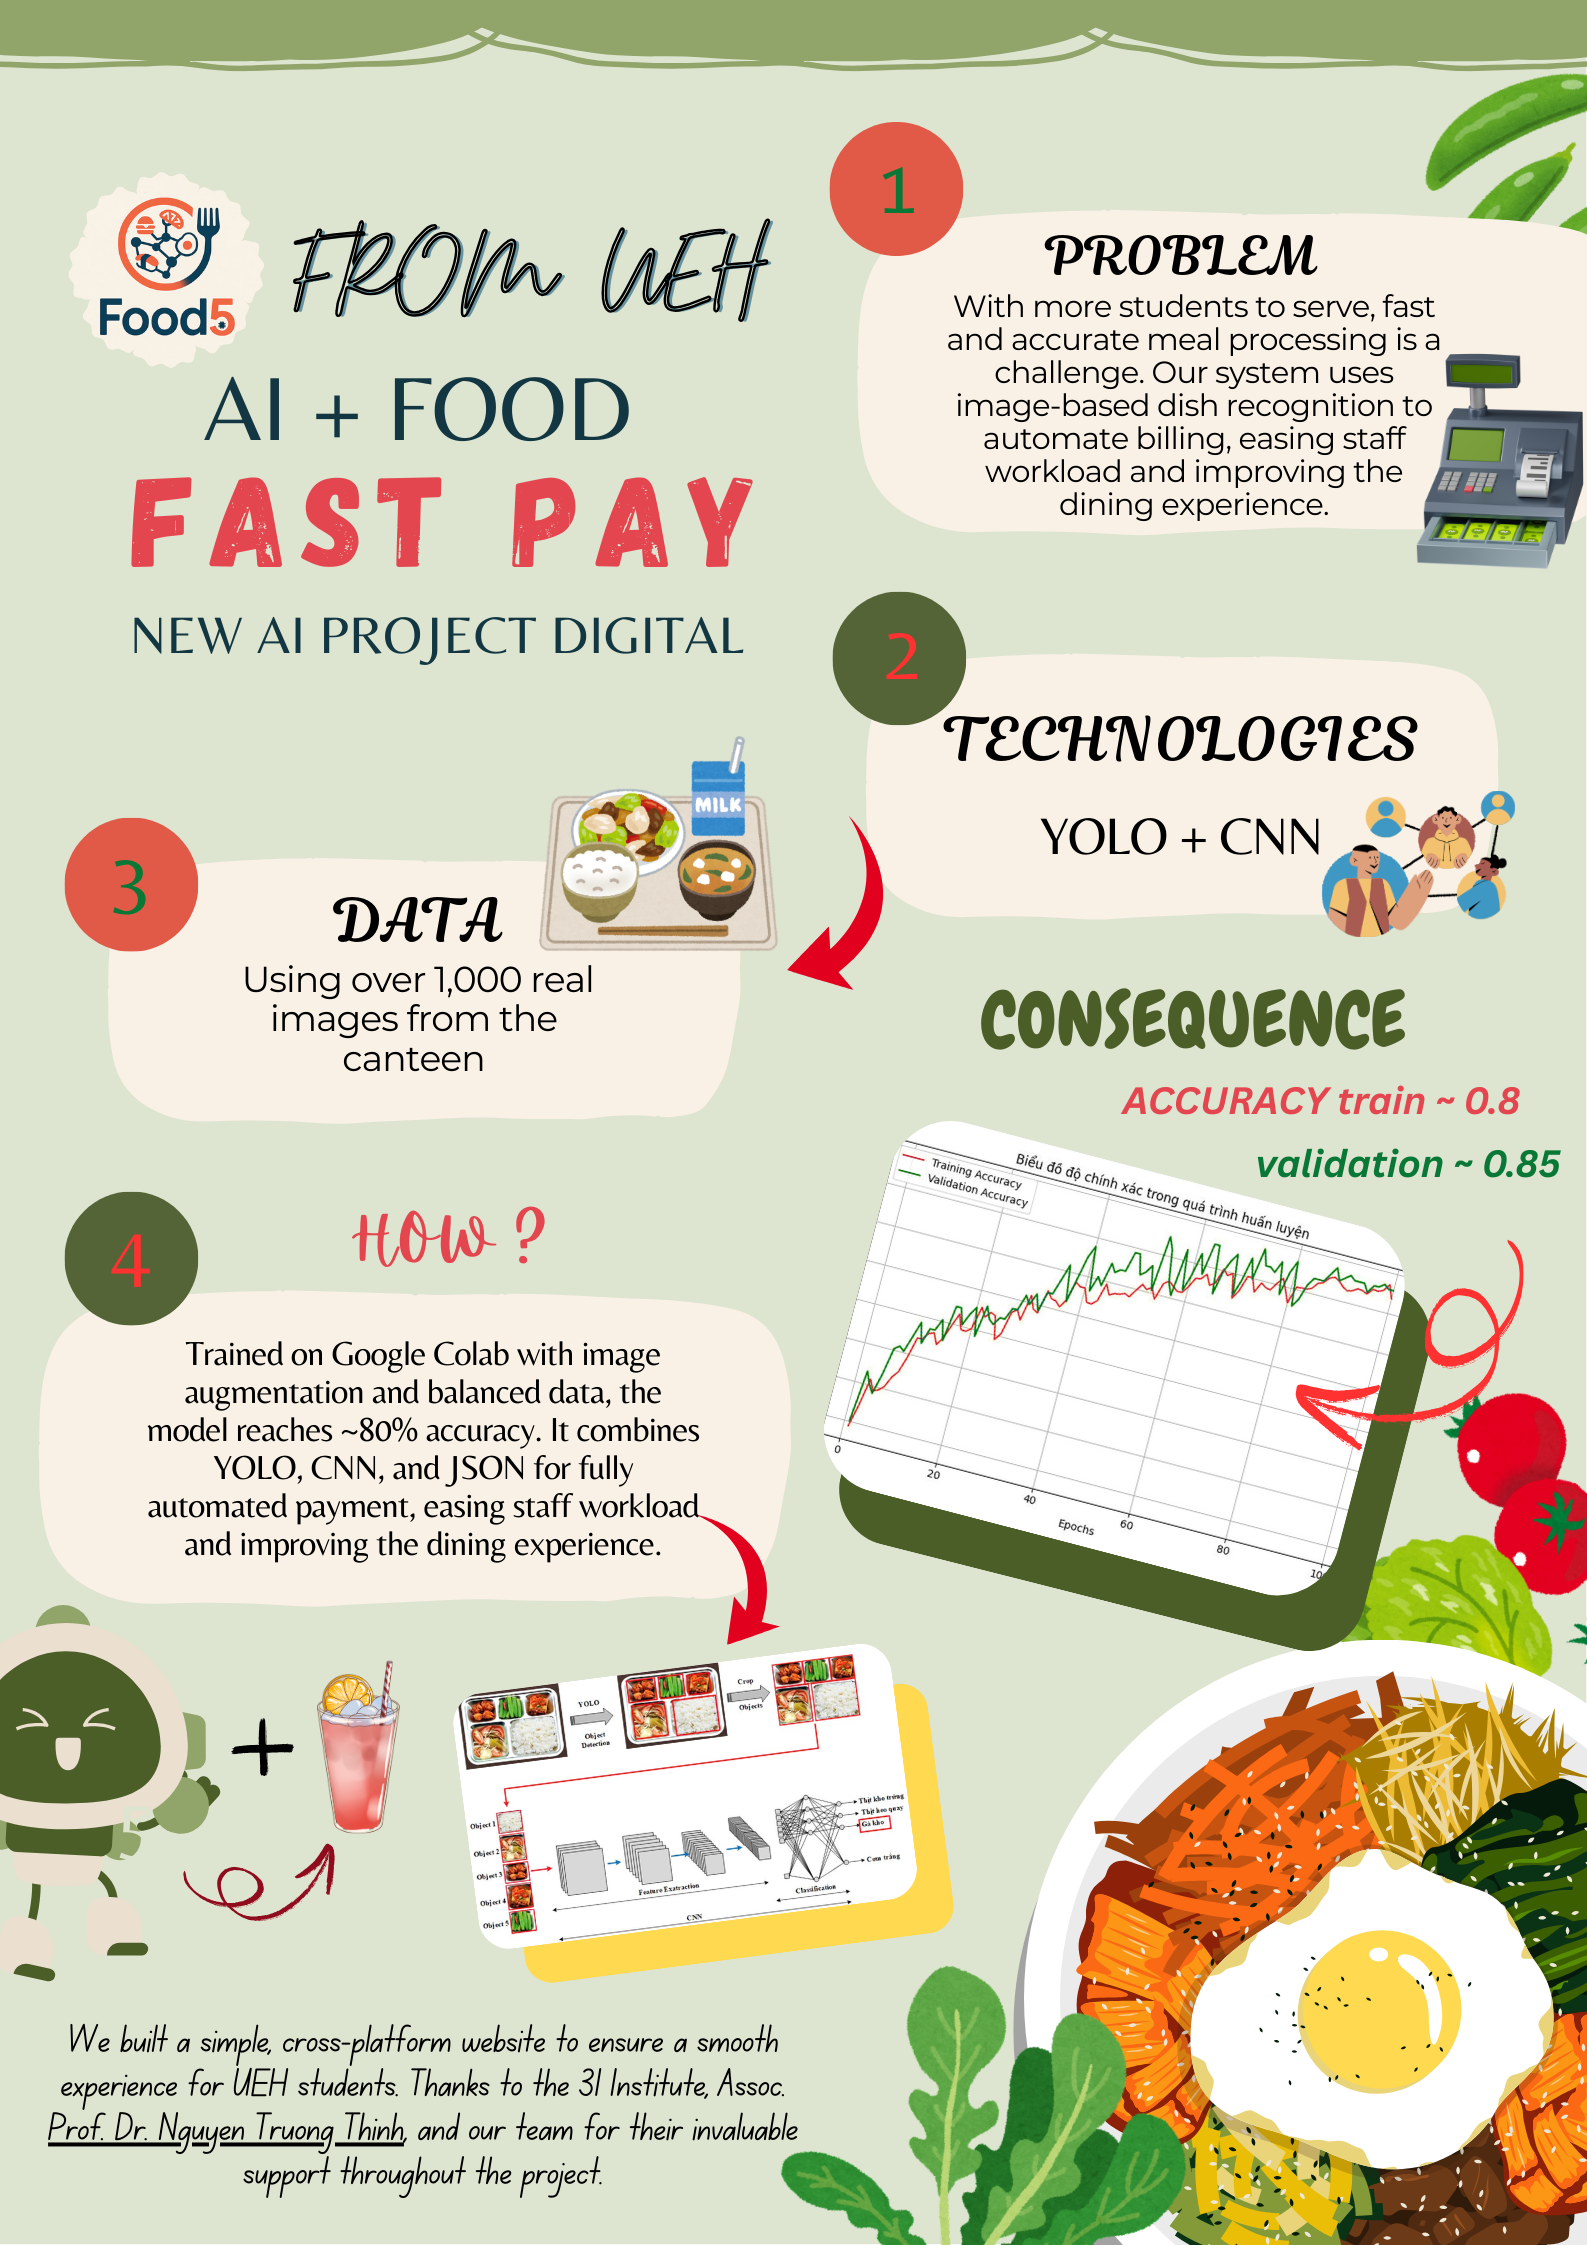

In [ ]:
from IPython.display import Image, display

print("✨ Welcome to F5 – Refreshing Ideas, Delicious Tech! 🚀")
print("🔓 Secret Unlocked: MEAL at UEH Canteen 🍱🎉")

poster_path = "/content/drive/MyDrive/F5 .png"
display(Image(poster_path))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 


image 1/1 /content/drive/MyDrive/14.jpg: 480x640 6 bowls, 399.4ms
Speed: 16.9ms preprocess, 399.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict3


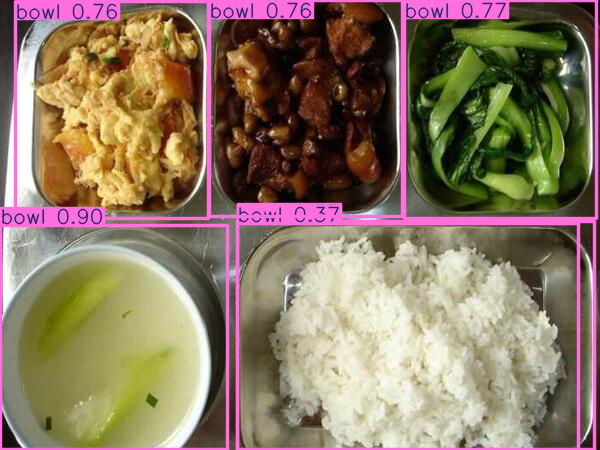

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
model = YOLO('yolov10n.pt')

results = model(source='/content/drive/MyDrive/14.jpg', save=True, save_crop=True, imgsz=640, conf=0.15)
img = cv2.imread('/content/drive/MyDrive/14.jpg')
results[0].show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

train_folder = '/content/drive/MyDrive/pj ai/train'
val_folder = '/content/drive/MyDrive/pj ai/val'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

validation_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)
print(train_generator.class_indices)
print(validation_generator.class_indices)

model = Sequential([
    Input(shape=(200,200,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/pj ai.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


Found 600 images belonging to 10 classes.
Found 99 images belonging to 10 classes.
{'canh cải': 0, 'canh chua': 1, 'cá hú kho': 2, 'cơm': 3, 'gà chiên': 4, 'rau muống xào': 5, 'thịt kho': 6, 'thịt kho trứng': 7, 'trứng chiên': 8, 'đậu hủ sốt cà chua': 9}
{'canh cải': 0, 'canh chua': 1, 'cá hú kho': 2, 'cơm': 3, 'gà chiên': 4, 'rau muống xào': 5, 'thịt kho': 6, 'thịt kho trứng': 7, 'trứng chiên': 8, 'đậu hủ sốt cà chua': 9}


In [ ]:
history = model.fit(
    train_generator,
    epochs=500,
    validation_data=validation_generator,
    callbacks=[early_stop, reduce_lr])

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.0811 - loss: 3.4975 - val_accuracy: 0.1010 - val_loss: 2.2103 - learning_rate: 0.0010
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.1152 - loss: 2.1749 - val_accuracy: 0.2323 - val_loss: 2.1473 - learning_rate: 0.0010
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.1921 - loss: 2.1400 - val_accuracy: 0.2020 - val_loss: 2.0143 - learning_rate: 0.0010
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.2118 - loss: 2.0270 - val_accuracy: 0.1818 - val_loss: 2.1499 - learning_rate: 0.0010
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.1861 - loss: 2.1177 - val_accuracy: 0.2323 - val_loss: 2.0330 - learning_rate: 0.0010
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.1989 - loss: 2.0545 - val_accuracy: 0.3030 - val_loss: 1.9381 - learning_rate: 0.0010
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.2171 - loss: 2.0092 - val_acc

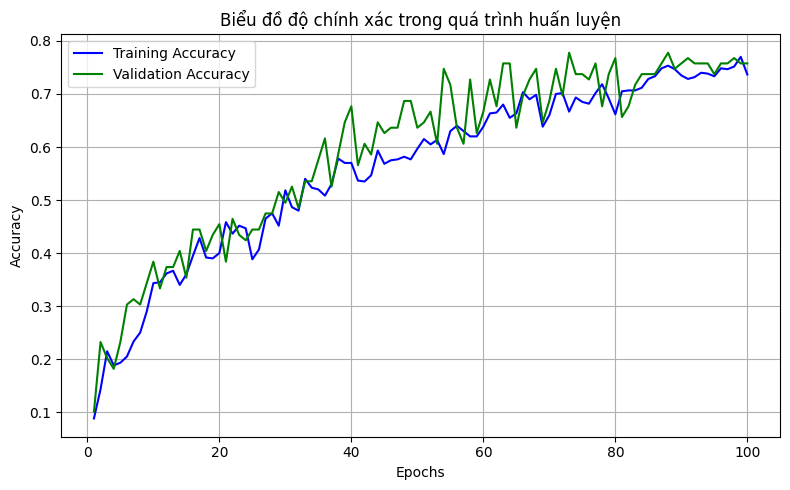

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g-', label='Validation Accuracy')
plt.title('Biểu đồ độ chính xác trong quá trình huấn luyện')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/pj ai.keras')

In [ ]:
import json

menu = {
    'canh cải': 5000,
    'canh chua': 5000,
    'cá hú kho': 15000,
    'cơm': 3000,
    'gà chiên': 8000,
    'rau muống xào': 5000,
    'thịt kho': 10000,
    'thịt kho trứng': 10000,
    'trứng chiên': 5000,
    'đậu hủ sốt cà chua': 7000}

with open('/content/drive/MyDrive/pj ai/menu.json', 'w', encoding='utf-8') as f:
    json.dump(menu, f, ensure_ascii=False, indent=4)



image 1/1 /content/drive/MyDrive/14.jpg: 480x640 6 bowls, 194.8ms
Speed: 9.2ms preprocess, 194.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


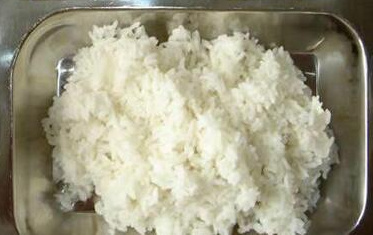

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


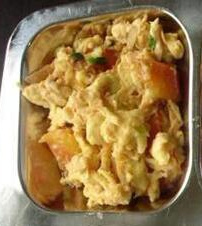

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


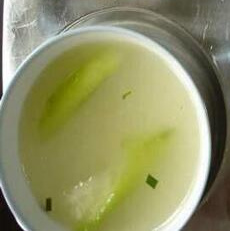

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


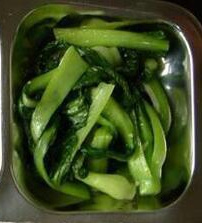

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


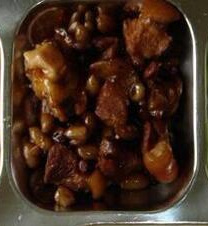


 Tổng cộng: 28,000 VND


In [ ]:
import json
import os
import glob
import unicodedata
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import Image as IPyImage, display, HTML
from ultralytics import YOLO
import cv2


model = YOLO('yolov10n.pt')
results = model(source='/content/drive/MyDrive/14.jpg', save=True, save_crop=True, imgsz=640, conf=0.15)

def normalize_text(text):
    return unicodedata.normalize('NFC', text)

# Load model
cnn_model = load_model('/content/drive/MyDrive/pj ai.keras')

classes = ['canh cải', 'canh chua', 'cá hú kho', 'cơm', 'gà chiên', 'rau muống xào', 'thịt kho',
           'thịt kho trứng', 'trứng chiên', 'đậu hủ sốt cà chua']

with open('/content/drive/MyDrive/pj ai/menu.json', 'r', encoding='utf-8') as f:
    menu_raw = json.load(f)

menu = {normalize_text(k): v for k, v in menu_raw.items()}

# Dự đoán tên món ăn
cropped = sorted(glob.glob('/content/runs/detect/predict*/crops'), key=os.path.getmtime, reverse=True)
latest_cropped = cropped[0]
predicted_dishes = []
total = 0

for dish_folder in os.listdir(latest_cropped):
    folder_path = os.path.join(latest_cropped, dish_folder)
    if not os.path.isdir(folder_path):
        continue

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Load ảnh và dự đoán
        img = image.load_img(img_path, target_size=(200, 200))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = cnn_model.predict(img_array)
        class_idx = np.argmax(prediction)
        dish_name = classes[class_idx]
        predicted_dishes.append(dish_name)

        dish_name_norm = normalize_text(dish_name)
        price = menu.get(dish_name_norm, 0)
        total += price

        display(IPyImage(img_path, width=250))
        display(HTML(f"<p><b>{dish_name}</b>: {price:,} VND</p>"))

# In tổng cộng
print(f"\n Tổng cộng: {total:,} VND")
print("===================")
